# Populations and intensities

In your `run` directory, change the `atoms.input` file so that the Ca is `PASSIVE` and the H atom is `ACTIVE`. In `keyword.input` set `15D_WRITE_POPS=TRUE` so that the level populations are written in the output and set `HYDROGEN_LTE = FALSE`. Leave everything else the same, run `rh15d_ray` and go through the following tasks:

* Examine the output. Look at the intensities of the H$\alpha$ line. 

In [1]:
##------ Usual package loading -----

import matplotlib.pyplot as plt
import numpy as np
import scipy
import xarray as xr
from helita.sim import rh15d

In [2]:
dpath_RH_output = '/Users/souvikb/rh/rh15d/run/output/'

In [3]:
data_Halpha = rh15d.Rh15dout(dpath_RH_output) # we use helita to read the output. You can also read it using xarrays as we discussed in the previous notebook.

--- Read /Users/souvikb/rh/rh15d/run/output/output_aux.hdf5 file.
--- Read /Users/souvikb/rh/rh15d/run/output/output_indata.hdf5 file.
--- Read /Users/souvikb/rh/rh15d/run/output/output_ray.hdf5 file.


Text(0.5, 1.0, 'H spectrum')

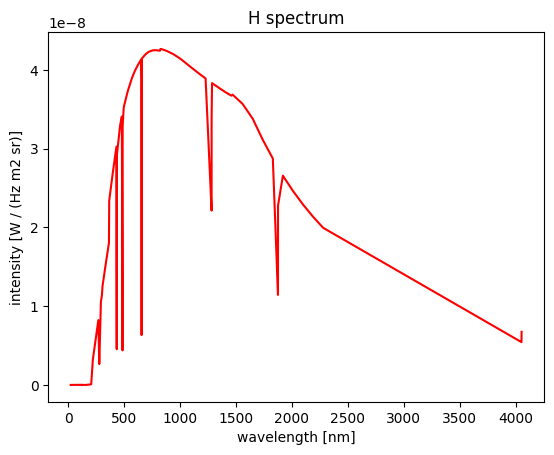

In [5]:
data_Halpha.ray.intensity.plot(color='red')
plt.title(r'H spectrum')

### Do you notice any difference between this and the the Ca spectrum plotted earlier?

Let us take a look at the H$\alpha$ spectrum with a center wavelength of 656.28 nm

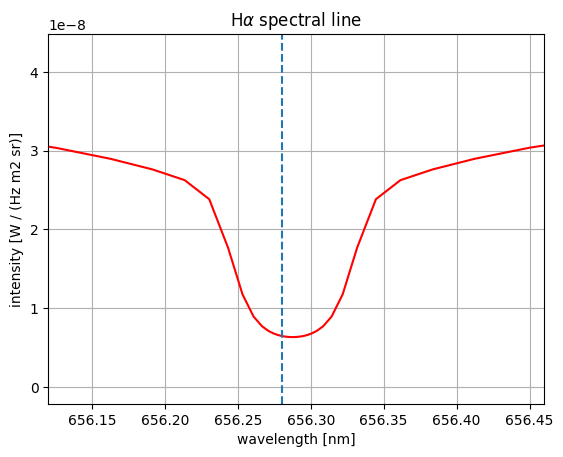

In [21]:
data_Halpha.ray.intensity.plot(color='red')
plt.title(r'H$\alpha$ spectral line')
plt.xlim([656.12,656.46])
plt.axvline(x=656.28,ls='--')
plt.grid('on')

Task 2:

* Look at the **level populations**, and **departure coefficients**. Which level has the strongest departures?

Since these information pertain to the specific (in this case H) atom, you need to look for these in the `data_Halpha.atom_H` xarray dataset.

In [18]:
data_Halpha.atom_H

<xarray.Dataset>
Dimensions:          (continuum: 5, x: 1, y: 1, height: 82, line: 10, level: 6)
Coordinates:
  * x                (x) float64 0.0
  * y                (y) float64 0.0
Dimensions without coordinates: continuum, height, line, level
Data variables:
    Rij_continuum    (continuum, x, y, height) float32 ...
    Rij_line         (line, x, y, height) float32 ...
    Rji_continuum    (continuum, x, y, height) float32 ...
    Rji_line         (line, x, y, height) float32 ...
    collision_rates  (level, level, x, y, height) float32 ...
    populations      (level, x, y, height) float32 ...
    populations_LTE  (level, x, y, height) float32 ...
Attributes:
    nlevel:      6
    nline:       10
    ncontinuum:  5

In [55]:
# We will convert the populations to numpy using datarray.to_numpy() function
pops_H = data_Halpha.atom_H.populations.to_numpy()
vertical_height = 1e-6*(data_Halpha.atmos.height_scale.to_numpy())

(-0.2, 2.2)

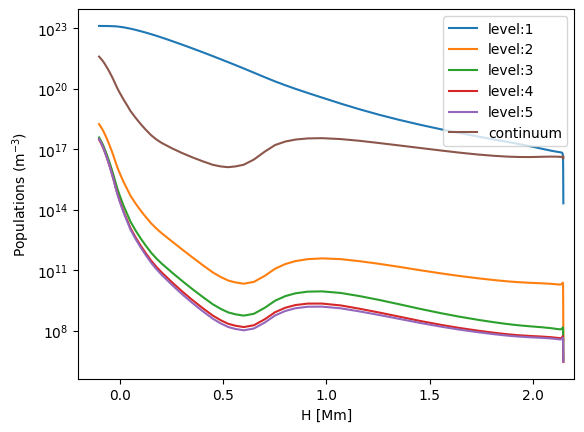

In [81]:
pop_state = ["level:1","level:2","level:3","level:4","level:5","continuum"]
for lev,state in enumerate(pop_state) :
    plt.plot(vertical_height[0,0,:],pops_H[lev,0,0,:],label=state)
plt.yscale('log')
plt.legend(loc='best')
plt.ylabel(r'Populations (m$^{-3}$)')
plt.xlabel('H [Mm]')
plt.xlim([-0.2,2.2])

## Can you interpret this variation of population with height?

# Depature coefficients ($\beta$)

Depature coefficients are defined as the ratio between the actual population of an atom and its LTE population:

$\beta$ = $\frac{n}{n_{LTE}}$.

These can de defined separately for upper(j) and lower(i) level like $\beta_{j}$ = $\frac{n_{j}}{n_{LTE,j}}$

* n$_{\mathrm{LTE}}$ is detemined by solving the Saha-Boltzmann statistics.

In [60]:
data_Halpha.atom_H

<xarray.Dataset>
Dimensions:          (continuum: 5, x: 1, y: 1, height: 82, line: 10, level: 6)
Coordinates:
  * x                (x) float64 0.0
  * y                (y) float64 0.0
Dimensions without coordinates: continuum, height, line, level
Data variables:
    Rij_continuum    (continuum, x, y, height) float32 ...
    Rij_line         (line, x, y, height) float32 ...
    Rji_continuum    (continuum, x, y, height) float32 ...
    Rji_line         (line, x, y, height) float32 ...
    collision_rates  (level, level, x, y, height) float32 ...
    populations      (level, x, y, height) float32 nan nan ... 3.877e+21
    populations_LTE  (level, x, y, height) float32 ...
Attributes:
    nlevel:      6
    nline:       10
    ncontinuum:  5

In [61]:
pops_H = data_Halpha.atom_H.populations.to_numpy()
pops_H_LTE = data_Halpha.atom_H.populations_LTE.to_numpy()

In [62]:
pops_H.shape, pops_H_LTE.shape

((6, 1, 1, 82), (6, 1, 1, 82))

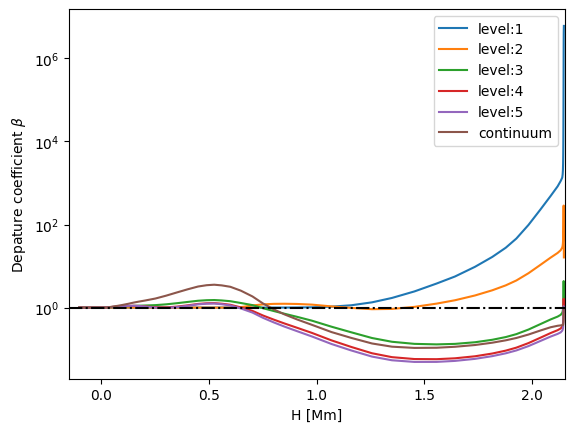

In [82]:
pop_state = ["level:1","level:2","level:3","level:4","level:5","continuum"]
for lev,state in enumerate(pop_state) :
    plt.plot(vertical_height[0,0,:],np.divide(pops_H[lev,0,0,:],pops_H_LTE[lev,0,0,:]),label=state)
plt.yscale('log')
plt.legend(loc='best')
plt.ylabel(r'Depature coefficient $\beta$')
plt.xlabel('H [Mm]')
plt.xlim([-0.15,2.15])
plt.axhline(y=1,ls='-.',color='black')

### Now can you answer which level has the strongest departures? What about the Balmer n: 2-->3 transition?

# LTE synthesis vs. NLTE synthesis

Rename the `output_ray.hdf5` file, e.g.

`mv output/output_ray.hdf5 output/output_ray_NLTE.hdf5`

Run RH again, but this time in LTE with `../rh15d_lteray`. This is a special binary that *only* runs the problem in LTE. While normal `rh15d_ray` can write out both LTE and non-LTE populations, to obtain the LTE intensities you must run `rh15d_lteray` (which only writes `output_ray.hdf5`, and no populations or any other output).

Now, let's compare the H$\alpha$ intensities in LTE and NLTE. What are the differences?

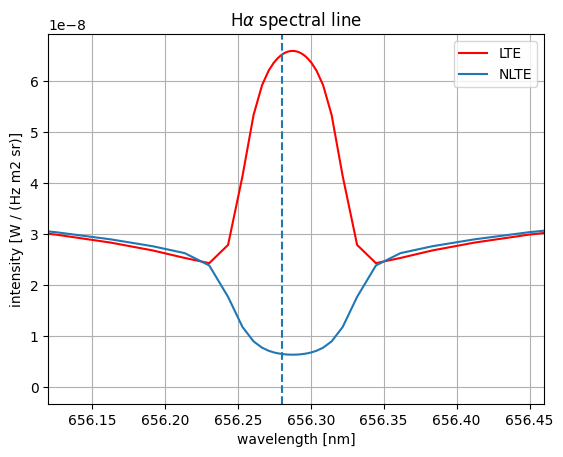

In [86]:
data_LTE = xr.open_dataset(dpath_RH_output+'output_ray.hdf5')
data_NLTE = xr.open_dataset(dpath_RH_output+'output_ray_NLTE.hdf5')

data_LTE.intensity.plot(color='red',label='LTE')
data_NLTE.intensity.plot(label='NLTE')
plt.title(r'H$\alpha$ spectral line')
plt.xlim([656.12,656.46])
plt.axvline(x=656.28,ls='--')
plt.grid('on')
plt.legend(loc='best')

# Given the FAL-C temperature stratification, can you explain why there is an abrupt difference here? 

# Can you repeat exactly the same analysis for the Ca II 854.2 nm line?
What are your conclusions?